# 🌾 Crop Production Data Analysis with Pandas and Matplotlib


This notebook explores an extended crop production dataset including weather, soil, irrigation, and farming practices.

### 🔍 Key Analysis Tasks:
- Load and explore the dataset
- Aggregate production and yield trends
- Visualize state-wise and crop-wise insights


In [8]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
sns.set_theme(style="whitegrid")


In [14]:

# Load the dataset
df = pd.read_csv("extended_crop_production_data (1).csv")
df.head()


,Year,State,District,Crop,Area_Hectares,Production_MT,Unit,Soil_Type,Irrigation_Type,Fertilizer_Used,...,Organic,Govt_Subsidy_Availed,Machinery_Used,Farming_Practice,Labor_Type,Crop_Cycle_Months,Yield_per_Hectare,Storage_Facility,Market_Access,Farmer_ID
0,2000,Punjab,Nancytown,Wheat,2294.19,7803.53,Metric Tonnes,Loamy,Canal,Compost,...,Yes,Yes,Combined Harvester,Modern,Family,3,3.40,Cold Storage,State,F40495
1,2000,Punjab,East Brandy,Wheat,1954.96,3542.36,Metric Tonnes,Peaty,Sprinkler,Urea,...,Yes,No,Combined Harvester,Modern,Family,9,1.81,Cold Storage,Export,F54597
2,2000,Punjab,Wilsontown,Wheat,4191.06,12221.74,Metric Tonnes,Sandy,Tube Well,DAP,...,No,Yes,Manual,Modern,Both,5,2.92,Cold Storage,Export,F80284
3,2000,Punjab,Torreschester,Wheat,8693.73,16732.63,Metric Tonnes,Loamy,Drip,Urea,...,Yes,Yes,Tractor,Mixed,Family,9,1.92,Warehouse,Local,F40512
4,2000,Punjab,West Kyle,Rice,2523.12,6432.72,Metric Tonnes,Silty,Rainfed,NPK,...,No,Yes,Combined Harvester,Modern,Both,8,2.55,NaN,Local,F89840


In [16]:

# Basic info
df.info()

# Check for null values
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5087 entries, 0 to 5086
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  5087 non-null   int64  
 1   State                 5087 non-null   object 
 2   District              5087 non-null   object 
 3   Crop                  5087 non-null   object 
 4   Area_Hectares         5087 non-null   float64
 5   Production_MT         5087 non-null   float64
 6   Unit                  5087 non-null   object 
 7   Soil_Type             5087 non-null   object 
 8   Irrigation_Type       5087 non-null   object 
 9   Fertilizer_Used       5087 non-null   object 
 10  Avg_Rainfall_mm       5087 non-null   float64
 11  Avg_Temp_C            5087 non-null   float64
 12  Weather_Condition     5087 non-null   object 
 13  Seed_Variety          5087 non-null   object 
 14  Pesticide_Used        5087 non-null   object 
 15  Organic              

Year                       0
State                      0
District                   0
Crop                       0
Area_Hectares              0
Production_MT              0
Unit                       0
Soil_Type                  0
Irrigation_Type            0
Fertilizer_Used            0
Avg_Rainfall_mm            0
Avg_Temp_C                 0
Weather_Condition          0
Seed_Variety               0
Pesticide_Used             0
Organic                    0
Govt_Subsidy_Availed       0
Machinery_Used             0
Farming_Practice           0
Labor_Type                 0
Crop_Cycle_Months          0
Yield_per_Hectare          0
Storage_Facility        1717
Market_Access              0
Farmer_ID                  0
dtype: int64

In [17]:

# Summary statistics
df.describe()


,Year,Area_Hectares,Production_MT,Avg_Rainfall_mm,Avg_Temp_C,Crop_Cycle_Months,Yield_per_Hectare
count,5087.000000,5087.000000,5087.000000,5087.000000,5087.000000,5087.000000,5087.000000
mean,2011.500295,4330.698412,10214.360948,224.926924,27.506438,5.993709,2.498400
std,6.919510,2670.904972,5589.519517,101.013228,7.263518,2.023835,0.575913
min,2000.000000,165.180000,502.630000,50.000000,15.000000,3.000000,1.500000
25%,2006.000000,2209.925000,5410.765000,136.735000,21.240000,4.000000,2.000000
50%,2011.000000,4064.790000,10258.180000,224.040000,27.430000,6.000000,2.500000
75%,2017.000000,6067.240000,14958.030000,312.875000,33.830000,8.000000,3.000000
max,2023.000000,13052.890000,19997.490000,399.970000,39.990000,9.000000,3.500000


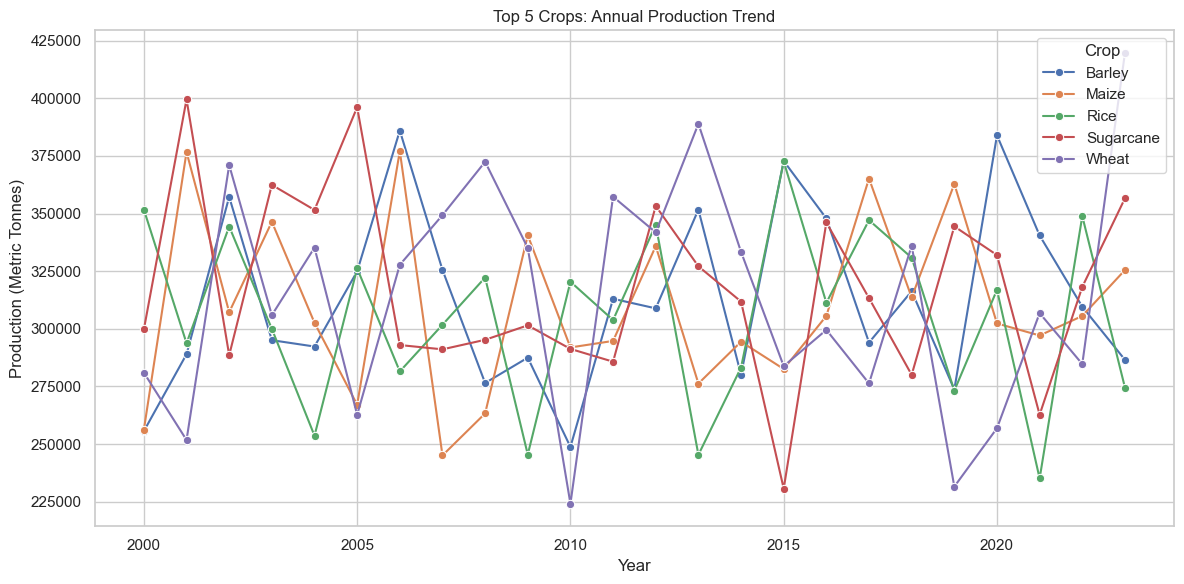

In [29]:
# Aggregate total production by crop
top_crops = df.groupby("Crop")["Production_MT"].sum().sort_values(ascending=False).head(5).index.tolist()

# Filter data to only include top 5 crops
df_top = df[df["Crop"].isin(top_crops)]

# Group by year and crop for plotting
annual_prod = df_top.groupby(["Year", "Crop"])["Production_MT"].sum().reset_index()

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=annual_prod, x="Year", y="Production_MT", hue="Crop", marker="o")
plt.title("Top 5 Crops: Annual Production Trend")
plt.xlabel("Year")
plt.ylabel("Production (Metric Tonnes)")
plt.legend(title="Crop")
plt.tight_layout()
plt.show()

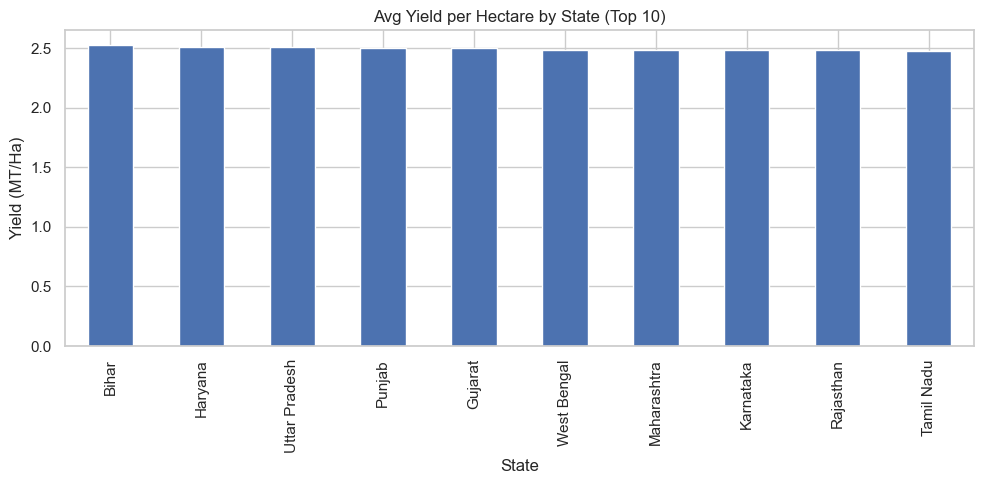

In [35]:

avg_yield_state = df.groupby('State')['Yield_per_Hectare'].mean().sort_values(ascending=False).head(10)
avg_yield_state.plot(kind='bar', figsize=(10,5), title="Avg Yield per Hectare by State (Top 10)")
plt.ylabel("Yield (MT/Ha)")
plt.xlabel("State")
plt.tight_layout()
plt.show()


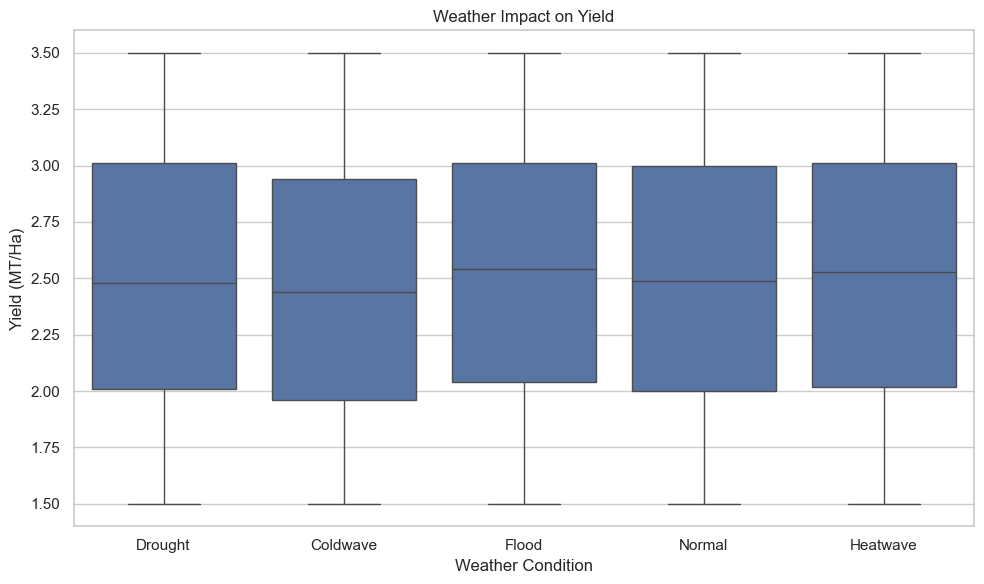

In [31]:

plt.figure(figsize=(10, 6))
sns.boxplot(x='Weather_Condition', y='Yield_per_Hectare', data=df)
plt.title("Weather Impact on Yield")
plt.ylabel("Yield (MT/Ha)")
plt.xlabel("Weather Condition")
plt.tight_layout()
plt.show()


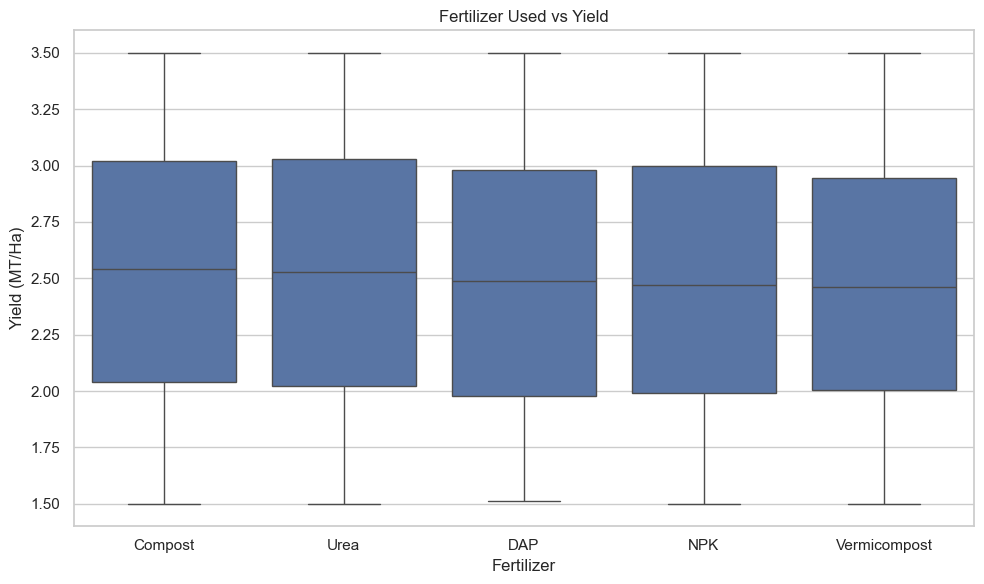

In [32]:

plt.figure(figsize=(10, 6))
sns.boxplot(x='Fertilizer_Used', y='Yield_per_Hectare', data=df)
plt.title("Fertilizer Used vs Yield")
plt.ylabel("Yield (MT/Ha)")
plt.xlabel("Fertilizer")
plt.tight_layout()
plt.show()
